In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import warnings
import numpy as np
from scipy.interpolate import make_interp_spline
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore", message="Workbook contains no default style, apply openpyxl's default")

# 환경 변수 로드
load_dotenv()
file_path_traffic_2023 = os.getenv('FiLE_PATH_traffic_2023')
file_path_traffic_2022 = os.getenv('FiLE_PATH_traffic_2022')
file_path_traffic_2021 = os.getenv("FiLE_PATH_traffic_2021")
file_path_traffic_2020 = os.getenv('FiLE_PATH_traffic_2020')
file_image_traffic = os.getenv('File_image_traffic_Car')
car_file = os.getenv('CAR_path')

# 파일 읽기
df_traffic_2023 = pd.read_excel(file_path_traffic_2023, engine='openpyxl')
df_traffic_2022 = pd.read_excel(file_path_traffic_2022, engine='openpyxl')
df_traffic_2021 = pd.read_excel(file_path_traffic_2021, engine='openpyxl')
df_traffic_2020 = pd.read_excel(file_path_traffic_2020, engine='openpyxl')

# 행 단위 합계 계산 (연도별)
row_sums_2023 = df_traffic_2023.sum(axis=1, numeric_only=True).tolist()
row_sums_2022 = df_traffic_2022.sum(axis=1, numeric_only=True).tolist()
row_sums_2021 = df_traffic_2021.sum(axis=1, numeric_only=True).tolist()
row_sums_2020 = df_traffic_2020.sum(axis=1, numeric_only=True).tolist()

print(row_sums_2023,row_sums_2022,row_sums_2021,row_sums_2020)

# 2. 자동차 등록 현황 데이터 불러오기 및 정리
df = pd.read_excel(car_file, skiprows=1, header=[0, 1], engine='openpyxl')


# '차종별(2)'가 '소계'인 행만 추출
df_filtered = df[df[('차종별(2)', '차종별(2)')] == '소계']


# '포함된 컬럼들 필터링
gasoline_columns = [col for col in df_filtered.columns if '소계' in col[1]]


    
# 열들 추출
gasoline_data = df_filtered[gasoline_columns].copy()


# 쉼표 제거하고 숫자로 변환
for col in gasoline_data.columns:
    gasoline_data[col] = gasoline_data[col].astype(str).str.replace(',', '').astype(int)

# 월별 휘발유 합계 리스트로 변환
monthly_gasoline_totals = gasoline_data.values.flatten().tolist()

chunk_size = 12
gasoline_totals = [monthly_gasoline_totals[i:i+chunk_size] for i in range(0, len(monthly_gasoline_totals), chunk_size)]
illegal_parking_totals = [row_sums_2020,row_sums_2021,row_sums_2022,row_sums_2023]

print(gasoline_totals)

[12394, 12742, 12918, 12934, 12972, 12888, 12666, 12584, 12918, 12868, 12836, 12586] [328, 12970, 12878, 12912, 13550, 13778, 13492, 13420, 13148, 13678, 13742, 13600, 13172] [12256, 13160, 13574, 13648, 13574, 13578, 13388, 13212, 13442, 13628, 13712, 13418] [404, 16022, 15580, 15336, 15864, 15942, 16066, 15964, 15294, 15542, 16184, 15936, 14970]
[[3127566, 3123984, 3125333, 3128523, 3133353, 3141710, 3147149, 3148071, 3151842, 3153732, 3157278, 3157361], [3159552, 3158102, 3158710, 3159075, 3160629, 3162985, 3171767, 3171749, 3175142, 3173961, 3177236, 3176743], [3178074, 3179328, 3180299, 3182255, 3184795, 3187333, 3189670, 3189058, 3190525, 3190108, 3192112, 3193351], [3194351, 3191681, 3191538, 3191516, 3190288, 3192434, 3192414, 3190446, 3192359, 3191832, 3191548, 3191162], [3191104, 3190358, 3187776, 3186470, 3186219, 3187055, 3184743, 3182265, 3181927, 3177864, 3177427, 3176933]]


In [2]:
# Flatten the lists and ensure same length
x = np.array([item for sublist in gasoline_totals for item in sublist])
y = np.array([item for sublist in illegal_parking_totals for item in sublist])
min_len = min(len(x), len(y))
x, y = x[:min_len].reshape(-1, 1), y[:min_len]

# Pearson correlation coefficient
pearson_corr, p_value = pearsonr(x.flatten(), y)

# Linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

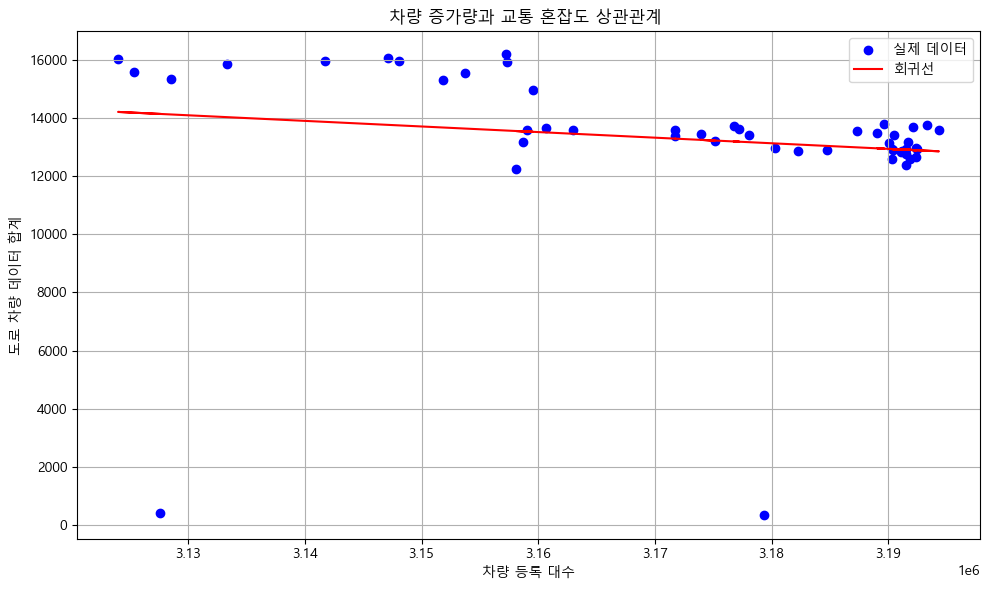

(-0.14129897689163157,
 0.32768583036992655,
 -0.019240461317166505,
 74312.37361794472)

In [6]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='실제 데이터', color='blue')
plt.plot(x, y_pred, color='red', label='회귀선')
plt.xlabel('차량 등록 대수')
plt.ylabel('도로 차량 데이터 합계')
plt.title('차량 증가량과 교통 혼잡도 상관관계 ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

pearson_corr, p_value, model.coef_[0], model.intercept_